In [368]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

<h3>Load the Dataset and investigate</h3>



In [413]:
streamworks_user =  pd.read_csv('streamworks_user_data.csv')
streamworks_user.head(10)

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99
5,1006.0,25.0,Male,25-06-23,13-07-25,USA,Premium,40.0,24.7,1.0,No,Yes,0.0,13.99
6,1007.0,38.0,Male,15-02-23,13-07-25,UK,Premium,57.8,83.9,0.0,No,Yes,0.0,14.99
7,1008.0,56.0,Male,20-12-22,13-07-25,Germany,Premium,9.0,35.6,5.0,No,Yes,0.0,14.99
8,1009.0,36.0,Other,30-05-25,13-07-25,UK,Standard,11.6,82.7,1.0,No,Yes,0.0,NaN
9,1010.0,40.0,Male,07-11-24,13-07-25,France,Basic,21.5,70.9,5.0,Yes,Yes,0.0,6.99


<h4>Data Exploration</h4>

In [414]:
streamworks_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [415]:
streamworks_user.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [416]:
streamworks_user.value_counts()

user_id  age   gender  signup_date  last_active_date  country  subscription_type  average_watch_hours  mobile_app_usage_pct  complaints_raised  received_promotions  referred_by_friend  is_churned  monthly_fee
1001.0   56.0  Other   02-04-25     13-07-25          France   Standard           42.6                 77.4                  1.0                No                   No                  1.0         10.99          1
2014.0   42.0  Female  29-08-24     13-07-25          India    Premium            30.0                 83.3                  2.0                No                   Yes                 0.0         13.99          1
2012.0   43.0  Other   30-03-24     13-07-25          France   Premium            59.0                 50.4                  3.0                No                   No                  0.0         13.99          1
2011.0   39.0  Female  04-07-25     13-07-25          France   Standard           10.2                 94.0                  5.0                No   

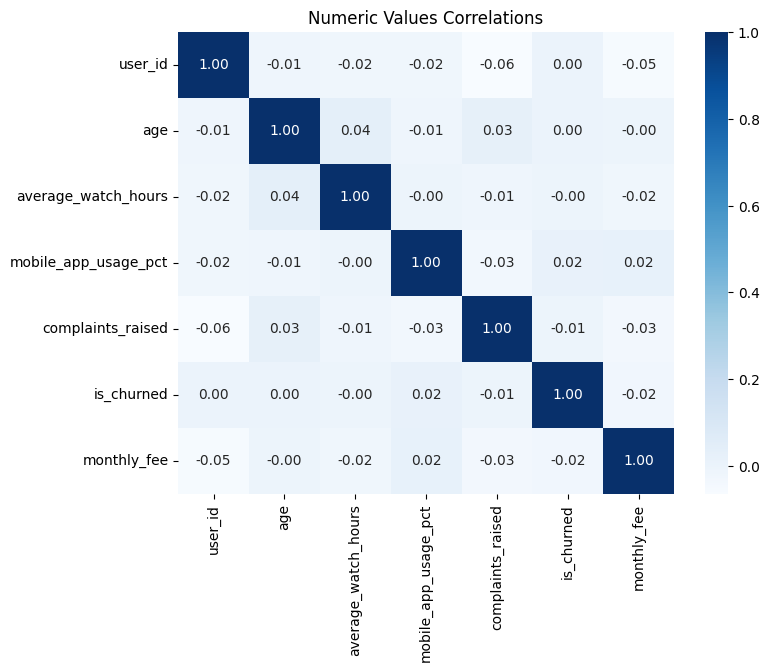

In [417]:
#Create a correlation matrix and heatmap (e.g. sns.heatmap()) for numeric variables

# establish correlation with heatmap to interpret relation and multicolinearity)
stw_corr = streamworks_user.select_dtypes(include='number')
stw_corr = stw_corr.corr()

#heatmap plot
plt.figure(figsize=(8,6))
sns.heatmap(stw_corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Numeric Values Correlations')
plt.show()

<h4> Clean & Prepare the Data</h4>

In [418]:
#Missingness as a percentage 
streamworks_user_perc = streamworks_user.isnull().sum()/streamworks_user.shape[0] * 100
print(streamworks_user_perc)

user_id                 0.133333
age                     0.200000
gender                  0.066667
signup_date             0.133333
last_active_date        0.133333
country                 0.200000
subscription_type       0.200000
average_watch_hours     0.266667
mobile_app_usage_pct    0.133333
complaints_raised       0.200000
received_promotions     0.200000
referred_by_friend      0.200000
is_churned              0.066667
monthly_fee             9.666667
dtype: float64


In [419]:
#before dropping dupilicates
print(streamworks_user.shape)
streamworks_user = streamworks_user.drop_duplicates(['user_id'])
#after dropping dupilicates
streamworks_user.shape

(1500, 14)


(1499, 14)

In [420]:
# drop NaN values in columns with less than 5% of missing data except for monthly_fee

dropna_columns = ['user_id', 'age', 'gender', 'signup_date', 'last_active_date',
       'country', 'subscription_type', 'average_watch_hours',
       'mobile_app_usage_pct', 'complaints_raised', 'received_promotions',
       'referred_by_friend', 'is_churned']

streamworks_user = streamworks_user.dropna(subset= dropna_columns)

#check missingness % again
streamworks_user_perc = streamworks_user.isnull().sum()/streamworks_user.shape[0] * 100
print(streamworks_user_perc)

user_id                 0.000000
age                     0.000000
gender                  0.000000
signup_date             0.000000
last_active_date        0.000000
country                 0.000000
subscription_type       0.000000
average_watch_hours     0.000000
mobile_app_usage_pct    0.000000
complaints_raised       0.000000
received_promotions     0.000000
referred_by_friend      0.000000
is_churned              0.000000
monthly_fee             9.688347
dtype: float64


In [421]:
#Convert signup_date, last_active_date to datetime 
for col in ['signup_date', 'last_active_date']:
    streamworks_user[col] = pd.to_datetime(streamworks_user[col], format='%d-%m-%y')
    


In [422]:
#Further data cleaning standardising columns
columns = streamworks_user.columns
def check_unique_values(streamworks_user, columns):
    unique_counts = {}
    for col in columns:
        unique_counts[col] = streamworks_user[col].nunique()
    return unique_counts

# List of columns to check
columns = streamworks_user.columns 

# Call the function
unique_values_info = check_unique_values(streamworks_user, columns)

# Print the results
for col, count in unique_values_info.items():
    print(f"{col} : {count} unique values")



user_id : 1476 unique values
age : 52 unique values
gender : 3 unique values
signup_date : 812 unique values
last_active_date : 1 unique values
country : 6 unique values
subscription_type : 3 unique values
average_watch_hours : 682 unique values
mobile_app_usage_pct : 767 unique values
complaints_raised : 6 unique values
received_promotions : 2 unique values
referred_by_friend : 2 unique values
is_churned : 2 unique values
monthly_fee : 6 unique values


In [423]:
# create new features

# Calculate 'tenure_days' as days between signup and last active date
streamworks_user['tenure_days'] = (streamworks_user['last_active_date'] - streamworks_user['signup_date']).dt.days

# Create 'is_loyal' based on 'tenure_days'
streamworks_user['is_loyal'] = streamworks_user['tenure_days'] > 180

In [424]:
# address to missing in streamworks_user['monthly_fee'] 
streamworks_user['monthly_fee'] = streamworks_user['monthly_fee'].mean() 

In [425]:
streamworks_user_perc = streamworks_user.isnull().sum()/streamworks_user.shape[0] * 100
print(streamworks_user_perc)

user_id                 0.0
age                     0.0
gender                  0.0
signup_date             0.0
last_active_date        0.0
country                 0.0
subscription_type       0.0
average_watch_hours     0.0
mobile_app_usage_pct    0.0
complaints_raised       0.0
received_promotions     0.0
referred_by_friend      0.0
is_churned              0.0
monthly_fee             0.0
tenure_days             0.0
is_loyal                0.0
dtype: float64


In [426]:
# Remove columns [ user_id, 'signup_date', 'last_active_date']
streamworks_user.drop(['signup_date', 'last_active_date', 'user_id'], axis=1, errors='ignore')

# Label Encode binary categorical features
features_label_cols = ['referred_by_friend','received_promotions','is_churned', 'is_loyal']
le = LabelEncoder()
for col in features_label_cols:
    streamworks_user[col] = le.fit_transform(streamworks_user[col])

#OneHotEncode categorical features pd.get_dummies()
features_onehot = ['gender', 'country', 'subscription_type']
streamworks_user_encoded = pd.get_dummies(streamworks_user, columns=features_onehot, drop_first=True )

# feature scaling these features
features_scale_cols = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 
                       'complaints_raised', 'monthly_fee', 'tenure_days']
scaler = MinMaxScaler()
streamworks_user[features_scale_cols] = scaler.fit_transform(
    streamworks_user[features_scale_cols]
)


<h4>3. Statistical Analysis & Insights</h4>

In [427]:
#Use Chi-square test to check if churn is related to gender, received_promotions, or referred_by_friend
#variables to test
col_test = ['gender', 'received_promotions', 'referred_by_friend']

for col in col_test:
    contingency_table = pd.crosstab(streamworks_user[col], streamworks_user['is_churned'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    significance = 'significant' if p_value < 0.05 else 'not significant'
    print(f"{col} vs. is_churned: p-value = {p_value:.4f} ({significance})")



gender vs. is_churned: p-value = 0.1336 (not significant)
received_promotions vs. is_churned: p-value = 0.1130 (not significant)
referred_by_friend vs. is_churned: p-value = 0.5397 (not significant)


In [428]:
#Use a t-test to check if watch time differs significantly between churned and retained users

# Separate watch time data for each group
watch_time_churned = streamworks_user[streamworks_user['is_churned'] == 1]['average_watch_hours']
watch_time_retained = streamworks_user[streamworks_user['is_churned'] == 0]['average_watch_hours']

# Perform independent t-test
t_stat, p_value = ttest_ind(watch_time_churned, watch_time_retained, equal_var=False)

print(f"T-test results:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")


T-test results:
t-statistic = -0.2721
p-value = 0.7856


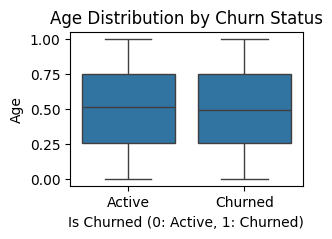

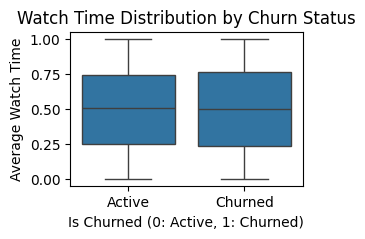

In [429]:
# Boxplot Age
plt.figure(figsize=(3, 2)) 
sns.boxplot(x='is_churned', y='age', data=streamworks_user)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Is Churned (0: Active, 1: Churned)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Active', 'Churned'])  
plt.show()

#Boxplot average_watch_hours
plt.figure(figsize=(3, 2)) 
sns.boxplot(x='is_churned', y='average_watch_hours', data=streamworks_user)
plt.title('Watch Time Distribution by Churn Status')
plt.xlabel('Is Churned (0: Active, 1: Churned)')
plt.ylabel('Average Watch Time')
plt.xticks([0, 1], ['Active', 'Churned'])  
plt.show()


<h4>4. Predictive Modelling</h4>

<h6>Define Features(X) and target (y)</h6>

In [439]:
X = streamworks_user[[ 'age', 'average_watch_hours',
       'mobile_app_usage_pct', 'complaints_raised', 'received_promotions',
       'referred_by_friend', 'monthly_fee', 'tenure_days',
       'is_loyal']] 
y = streamworks_user['is_churned']


<h6>Split Data</h6>

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 


<h6>Feature Scaling</h6>

In [441]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit AND transform train data
X_test = scaler.transform(X_test)  # Transform test data

<h6>Train Model</h6>

In [442]:

# Initialise logistic regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)  # 'liblinear' works well for small datasets
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

<h6>Predictions</h6>

In [454]:
y_pred = model.predict(X_test)  # Predicted classes (0 or 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

<h6>Model Evaluation</h6>

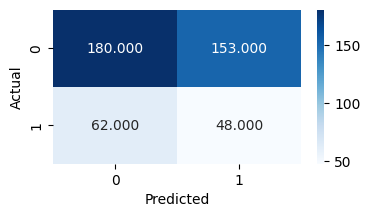

Adjusted Precision: 0.2483
Adjusted Recall: 1.0000
Adjusted F1 Score: 0.3978


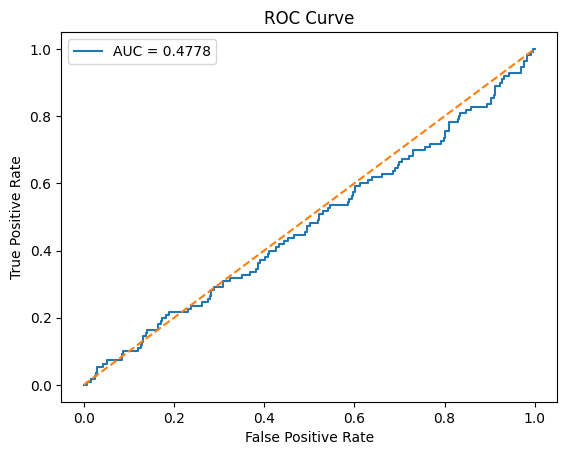

In [455]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Adjust threshold
threshold = 0.3
y_pred_adjusted = (y_probs > threshold).astype(int)

# Calculate metrics with adjusted threshold
adjusted_precision = precision_score(y_test, y_pred_adjusted, zero_division=1)
adjusted_recall = recall_score(y_test, y_pred_adjusted, zero_division=1)
adjusted_f1 = f1_score(y_test, y_pred_adjusted, zero_division=1)

print(f"Adjusted Precision: {adjusted_precision:.4f}")
print(f"Adjusted Recall: {adjusted_recall:.4f}")
print(f"Adjusted F1 Score: {adjusted_f1:.4f}")


# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h4>Business Questions</h4>

<h6>Do users who receive promotions churn less?</h6>

In [410]:
# Churn rate among promoted users
promoted_churn_rate = streamworks_user[streamworks_user['received_promotions'] == 1]['is_churned'].mean()

# Churn rate among non-promoted users
non_promoted_churn_rate = streamworks_user[streamworks_user['received_promotions'] == 0]['is_churned'].mean()

print(f"Churn rate with promotion: {promoted_churn_rate:.2%}")
print(f"Churn rate without promotion: {non_promoted_churn_rate:.2%}")


Churn rate with promotion: 21.19%
Churn rate without promotion: 24.80%


<h6>Does watch time impact churn likelihood?</h6>

In [411]:
col_test = ['average_watch_hours', 'mobile_app_usage_pct']

for col in col_test:
    contingency_table = pd.crosstab(streamworks_user[col], streamworks_user['is_churned'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    significance = 'significant' if p_value < 0.05 else 'not significant'
    print(f"{col} vs. is_churned: p-value = {p_value:.4f} ({significance})")

average_watch_hours vs. is_churned: p-value = 0.3341 (not significant)
mobile_app_usage_pct vs. is_churned: p-value = 0.3301 (not significant)


<h6>What are the top 3 features influencing churn based on your model?</h6>

In [412]:

# Get feature names
feature_names = X.columns

# Retrieve the coefficients
coefficients = model.coef_[0]

# Create a DataFrame for easier interpretation
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Calculate the absolute value to assess importance regardless of direction
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Sort features by importance
top_features = coef_df.sort_values(by='abs_coefficient', ascending=False).head(3)

print(top_features)


               feature  coefficient  abs_coefficient
4  received_promotions    -0.131804         0.131804
8             is_loyal     0.101373         0.101373
1  average_watch_hours    -0.059757         0.059757


<h6>Which customer segments should the retention team prioritise?</h6>